# Prohpet Model

# 1. Introduction

In this notebook, we use the Facebook Prophet library to forecast the close prices of crude oil.

# 2. Imports

In [1]:
# General Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

# Prophet Imports
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

# Evaluation imports
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

# 3. Import Data

In [2]:
df = pd.read_csv("m5barreport270923.csv",index_col=0,parse_dates=True)

In [3]:
df.head()

,Date,Time,Volume,Open,High,Low,Close,Market
Datetime,,,,,,,,
2023-07-17 00:05:00,7/17/23,00:05,146,74.81,74.85,74.80,74.82,GX
2023-07-17 00:10:00,7/17/23,00:10,180,74.81,74.85,74.80,74.84,GX
2023-07-17 00:15:00,7/17/23,00:15,62,74.83,74.85,74.80,74.83,GX
2023-07-17 00:20:00,7/17/23,00:20,25,74.84,74.86,74.84,74.86,GX
2023-07-17 00:25:00,7/17/23,00:25,168,74.85,74.85,74.77,74.82,GX


We forecast on the close price, so we transform DataFrame to what the format used by Prophet.

In [4]:
df_close = pd.DataFrame(df['Close'])
df_close.reset_index(inplace=True)  
df_close[['ds','y']] = df_close[['Datetime','Close']]
df_close.drop(['Datetime','Close'],inplace=True,axis=1)

In [5]:
df_close.head()

,ds,y
0,2023-07-17 00:05:00,74.82
1,2023-07-17 00:10:00,74.84
2,2023-07-17 00:15:00,74.83
3,2023-07-17 00:20:00,74.86
4,2023-07-17 00:25:00,74.82


In [6]:
# Check the length of the dataset
len(df_close)

21023

# 4. Data Visualization

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Close Price')]

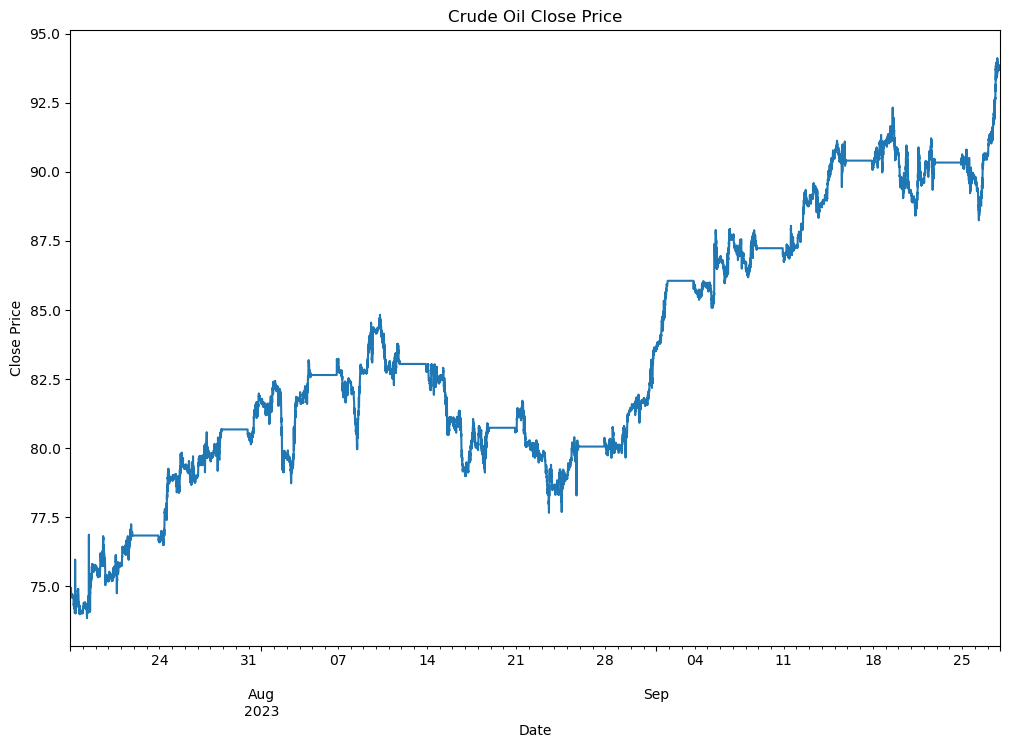

In [7]:
ax = df['Close'].plot(figsize=(12,8), title = 'Crude Oil Close Price',legend=False)
ax.set(xlabel='Date',ylabel='Close Price')

# 3. Train-test Split, Fit and Predictions

We are using the 5-min chart for trades. Each day has 24*60/5 = 288 Bars. We would like to make rolling predictions on the data we have, i.e., for each subinterval of the data, we predict the subsequent period.

Data is split into training sets and test sets as follows: The first period of N observations is taken as the first training set, and the following n observations are taken to be the first test set. Then, the next training set is taken to be N+n, and the second test set is taken from N+n+1 to N+2n, i.e., we make a stride = n. We continue to roll to the end of the dataset.

In [12]:
# Define and empty DataFrame with the columns of the Prophet results table, to be filled with predictions
all_predictions =  pd.DataFrame(columns=['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'])

In [13]:
# Define the lengths of the training data and test data
train_length = 288
test_span = 10

# Create an empty list to append prediction DataFrames of each training set
predictions = []

# Loop over batches of training sets. For each set, fit the model, then make predictions for the following 
# period on n observations, then append the results in the forecast list
for i in range(1+int((len(df_close['y'])-train_length)/test_span)):
    
    m = Prophet()   
    m.fit(df_close.iloc[i*test_span:i*test_span+train_length])
    future = m.make_future_dataframe(periods = test_span, freq='5T')
    prediction = np.round(m.predict(future),2)
    forecast = prediction.iloc[-test_span:]
    predictions.append(forecast)

09:07:56 - cmdstanpy - INFO - Chain [1] start processing
09:07:56 - cmdstanpy - INFO - Chain [1] done processing
09:07:56 - cmdstanpy - INFO - Chain [1] start processing
09:07:56 - cmdstanpy - INFO - Chain [1] done processing
09:07:56 - cmdstanpy - INFO - Chain [1] start processing
09:07:56 - cmdstanpy - INFO - Chain [1] done processing
09:07:56 - cmdstanpy - INFO - Chain [1] start processing
09:07:56 - cmdstanpy - INFO - Chain [1] done processing
09:07:56 - cmdstanpy - INFO - Chain [1] start processing
09:07:56 - cmdstanpy - INFO - Chain [1] done processing
09:07:56 - cmdstanpy - INFO - Chain [1] start processing
09:07:56 - cmdstanpy - INFO - Chain [1] done processing
09:07:56 - cmdstanpy - INFO - Chain [1] start processing
09:07:56 - cmdstanpy - INFO - Chain [1] done processing
09:07:57 - cmdstanpy - INFO - Chain [1] start processing
09:07:57 - cmdstanpy - INFO - Chain [1] done processing
09:07:57 - cmdstanpy - INFO - Chain [1] start processing
09:07:57 - cmdstanpy - INFO - Chain [1]

09:08:05 - cmdstanpy - INFO - Chain [1] done processing
09:08:05 - cmdstanpy - INFO - Chain [1] start processing
09:08:05 - cmdstanpy - INFO - Chain [1] done processing
09:08:05 - cmdstanpy - INFO - Chain [1] start processing
09:08:05 - cmdstanpy - INFO - Chain [1] done processing
09:08:05 - cmdstanpy - INFO - Chain [1] start processing
09:08:05 - cmdstanpy - INFO - Chain [1] done processing
09:08:05 - cmdstanpy - INFO - Chain [1] start processing
09:08:05 - cmdstanpy - INFO - Chain [1] done processing
09:08:05 - cmdstanpy - INFO - Chain [1] start processing
09:08:05 - cmdstanpy - INFO - Chain [1] done processing
09:08:05 - cmdstanpy - INFO - Chain [1] start processing
09:08:05 - cmdstanpy - INFO - Chain [1] done processing
09:08:05 - cmdstanpy - INFO - Chain [1] start processing
09:08:05 - cmdstanpy - INFO - Chain [1] done processing
09:08:06 - cmdstanpy - INFO - Chain [1] start processing
09:08:06 - cmdstanpy - INFO - Chain [1] done processing
09:08:06 - cmdstanpy - INFO - Chain [1] 

09:08:16 - cmdstanpy - INFO - Chain [1] done processing
09:08:16 - cmdstanpy - INFO - Chain [1] start processing
09:08:16 - cmdstanpy - INFO - Chain [1] done processing
09:08:16 - cmdstanpy - INFO - Chain [1] start processing
09:08:16 - cmdstanpy - INFO - Chain [1] done processing
09:08:16 - cmdstanpy - INFO - Chain [1] start processing
09:08:16 - cmdstanpy - INFO - Chain [1] done processing
09:08:16 - cmdstanpy - INFO - Chain [1] start processing
09:08:16 - cmdstanpy - INFO - Chain [1] done processing
09:08:16 - cmdstanpy - INFO - Chain [1] start processing
09:08:17 - cmdstanpy - INFO - Chain [1] done processing
09:08:17 - cmdstanpy - INFO - Chain [1] start processing
09:08:17 - cmdstanpy - INFO - Chain [1] done processing
09:08:17 - cmdstanpy - INFO - Chain [1] start processing
09:08:17 - cmdstanpy - INFO - Chain [1] done processing
09:08:17 - cmdstanpy - INFO - Chain [1] start processing
09:08:17 - cmdstanpy - INFO - Chain [1] done processing
09:08:17 - cmdstanpy - INFO - Chain [1] 

09:08:25 - cmdstanpy - INFO - Chain [1] done processing
09:08:25 - cmdstanpy - INFO - Chain [1] start processing
09:08:25 - cmdstanpy - INFO - Chain [1] done processing
09:08:25 - cmdstanpy - INFO - Chain [1] start processing
09:08:25 - cmdstanpy - INFO - Chain [1] done processing
09:08:25 - cmdstanpy - INFO - Chain [1] start processing
09:08:25 - cmdstanpy - INFO - Chain [1] done processing
09:08:25 - cmdstanpy - INFO - Chain [1] start processing
09:08:25 - cmdstanpy - INFO - Chain [1] done processing
09:08:25 - cmdstanpy - INFO - Chain [1] start processing
09:08:25 - cmdstanpy - INFO - Chain [1] done processing
09:08:25 - cmdstanpy - INFO - Chain [1] start processing
09:08:25 - cmdstanpy - INFO - Chain [1] done processing
09:08:25 - cmdstanpy - INFO - Chain [1] start processing
09:08:25 - cmdstanpy - INFO - Chain [1] done processing
09:08:25 - cmdstanpy - INFO - Chain [1] start processing
09:08:25 - cmdstanpy - INFO - Chain [1] done processing
09:08:26 - cmdstanpy - INFO - Chain [1] 

09:08:34 - cmdstanpy - INFO - Chain [1] done processing
09:08:34 - cmdstanpy - INFO - Chain [1] start processing
09:08:34 - cmdstanpy - INFO - Chain [1] done processing
09:08:34 - cmdstanpy - INFO - Chain [1] start processing
09:08:34 - cmdstanpy - INFO - Chain [1] done processing
09:08:34 - cmdstanpy - INFO - Chain [1] start processing
09:08:34 - cmdstanpy - INFO - Chain [1] done processing
09:08:34 - cmdstanpy - INFO - Chain [1] start processing
09:08:34 - cmdstanpy - INFO - Chain [1] done processing
09:08:34 - cmdstanpy - INFO - Chain [1] start processing
09:08:34 - cmdstanpy - INFO - Chain [1] done processing
09:08:34 - cmdstanpy - INFO - Chain [1] start processing
09:08:34 - cmdstanpy - INFO - Chain [1] done processing
09:08:34 - cmdstanpy - INFO - Chain [1] start processing
09:08:35 - cmdstanpy - INFO - Chain [1] done processing
09:08:35 - cmdstanpy - INFO - Chain [1] start processing
09:08:35 - cmdstanpy - INFO - Chain [1] done processing
09:08:35 - cmdstanpy - INFO - Chain [1] 

09:08:45 - cmdstanpy - INFO - Chain [1] done processing
09:08:45 - cmdstanpy - INFO - Chain [1] start processing
09:08:45 - cmdstanpy - INFO - Chain [1] done processing
09:08:45 - cmdstanpy - INFO - Chain [1] start processing
09:08:45 - cmdstanpy - INFO - Chain [1] done processing
09:08:45 - cmdstanpy - INFO - Chain [1] start processing
09:08:45 - cmdstanpy - INFO - Chain [1] done processing
09:08:45 - cmdstanpy - INFO - Chain [1] start processing
09:08:45 - cmdstanpy - INFO - Chain [1] done processing
09:08:45 - cmdstanpy - INFO - Chain [1] start processing
09:08:45 - cmdstanpy - INFO - Chain [1] done processing
09:08:45 - cmdstanpy - INFO - Chain [1] start processing
09:08:45 - cmdstanpy - INFO - Chain [1] done processing
09:08:45 - cmdstanpy - INFO - Chain [1] start processing
09:08:45 - cmdstanpy - INFO - Chain [1] done processing
09:08:45 - cmdstanpy - INFO - Chain [1] start processing
09:08:46 - cmdstanpy - INFO - Chain [1] done processing
09:08:46 - cmdstanpy - INFO - Chain [1] 

09:08:54 - cmdstanpy - INFO - Chain [1] done processing
09:08:54 - cmdstanpy - INFO - Chain [1] start processing
09:08:54 - cmdstanpy - INFO - Chain [1] done processing
09:08:54 - cmdstanpy - INFO - Chain [1] start processing
09:08:54 - cmdstanpy - INFO - Chain [1] done processing
09:08:54 - cmdstanpy - INFO - Chain [1] start processing
09:08:54 - cmdstanpy - INFO - Chain [1] done processing
09:08:54 - cmdstanpy - INFO - Chain [1] start processing
09:08:54 - cmdstanpy - INFO - Chain [1] done processing
09:08:54 - cmdstanpy - INFO - Chain [1] start processing
09:08:54 - cmdstanpy - INFO - Chain [1] done processing
09:08:54 - cmdstanpy - INFO - Chain [1] start processing
09:08:54 - cmdstanpy - INFO - Chain [1] done processing
09:08:54 - cmdstanpy - INFO - Chain [1] start processing
09:08:54 - cmdstanpy - INFO - Chain [1] done processing
09:08:54 - cmdstanpy - INFO - Chain [1] start processing
09:08:55 - cmdstanpy - INFO - Chain [1] done processing
09:08:55 - cmdstanpy - INFO - Chain [1] 

09:09:04 - cmdstanpy - INFO - Chain [1] done processing
09:09:04 - cmdstanpy - INFO - Chain [1] start processing
09:09:05 - cmdstanpy - INFO - Chain [1] done processing
09:09:05 - cmdstanpy - INFO - Chain [1] start processing
09:09:05 - cmdstanpy - INFO - Chain [1] done processing
09:09:05 - cmdstanpy - INFO - Chain [1] start processing
09:09:05 - cmdstanpy - INFO - Chain [1] done processing
09:09:05 - cmdstanpy - INFO - Chain [1] start processing
09:09:05 - cmdstanpy - INFO - Chain [1] done processing
09:09:05 - cmdstanpy - INFO - Chain [1] start processing
09:09:05 - cmdstanpy - INFO - Chain [1] done processing
09:09:05 - cmdstanpy - INFO - Chain [1] start processing
09:09:05 - cmdstanpy - INFO - Chain [1] done processing
09:09:05 - cmdstanpy - INFO - Chain [1] start processing
09:09:05 - cmdstanpy - INFO - Chain [1] done processing
09:09:05 - cmdstanpy - INFO - Chain [1] start processing
09:09:05 - cmdstanpy - INFO - Chain [1] done processing
09:09:05 - cmdstanpy - INFO - Chain [1] 

09:09:13 - cmdstanpy - INFO - Chain [1] done processing
09:09:13 - cmdstanpy - INFO - Chain [1] start processing
09:09:13 - cmdstanpy - INFO - Chain [1] done processing
09:09:13 - cmdstanpy - INFO - Chain [1] start processing
09:09:13 - cmdstanpy - INFO - Chain [1] done processing
09:09:13 - cmdstanpy - INFO - Chain [1] start processing
09:09:13 - cmdstanpy - INFO - Chain [1] done processing
09:09:14 - cmdstanpy - INFO - Chain [1] start processing
09:09:14 - cmdstanpy - INFO - Chain [1] done processing
09:09:14 - cmdstanpy - INFO - Chain [1] start processing
09:09:14 - cmdstanpy - INFO - Chain [1] done processing
09:09:14 - cmdstanpy - INFO - Chain [1] start processing
09:09:14 - cmdstanpy - INFO - Chain [1] done processing
09:09:14 - cmdstanpy - INFO - Chain [1] start processing
09:09:14 - cmdstanpy - INFO - Chain [1] done processing
09:09:14 - cmdstanpy - INFO - Chain [1] start processing
09:09:14 - cmdstanpy - INFO - Chain [1] done processing
09:09:14 - cmdstanpy - INFO - Chain [1] 

09:09:24 - cmdstanpy - INFO - Chain [1] done processing
09:09:24 - cmdstanpy - INFO - Chain [1] start processing
09:09:24 - cmdstanpy - INFO - Chain [1] done processing
09:09:24 - cmdstanpy - INFO - Chain [1] start processing
09:09:24 - cmdstanpy - INFO - Chain [1] done processing
09:09:24 - cmdstanpy - INFO - Chain [1] start processing
09:09:24 - cmdstanpy - INFO - Chain [1] done processing
09:09:25 - cmdstanpy - INFO - Chain [1] start processing
09:09:25 - cmdstanpy - INFO - Chain [1] done processing
09:09:25 - cmdstanpy - INFO - Chain [1] start processing
09:09:25 - cmdstanpy - INFO - Chain [1] done processing
09:09:25 - cmdstanpy - INFO - Chain [1] start processing
09:09:25 - cmdstanpy - INFO - Chain [1] done processing
09:09:25 - cmdstanpy - INFO - Chain [1] start processing
09:09:25 - cmdstanpy - INFO - Chain [1] done processing
09:09:25 - cmdstanpy - INFO - Chain [1] start processing
09:09:25 - cmdstanpy - INFO - Chain [1] done processing
09:09:25 - cmdstanpy - INFO - Chain [1] 

09:09:34 - cmdstanpy - INFO - Chain [1] done processing
09:09:34 - cmdstanpy - INFO - Chain [1] start processing
09:09:34 - cmdstanpy - INFO - Chain [1] done processing
09:09:34 - cmdstanpy - INFO - Chain [1] start processing
09:09:34 - cmdstanpy - INFO - Chain [1] done processing
09:09:34 - cmdstanpy - INFO - Chain [1] start processing
09:09:34 - cmdstanpy - INFO - Chain [1] done processing
09:09:34 - cmdstanpy - INFO - Chain [1] start processing
09:09:34 - cmdstanpy - INFO - Chain [1] done processing
09:09:34 - cmdstanpy - INFO - Chain [1] start processing
09:09:34 - cmdstanpy - INFO - Chain [1] done processing
09:09:34 - cmdstanpy - INFO - Chain [1] start processing
09:09:34 - cmdstanpy - INFO - Chain [1] done processing
09:09:34 - cmdstanpy - INFO - Chain [1] start processing
09:09:34 - cmdstanpy - INFO - Chain [1] done processing
09:09:35 - cmdstanpy - INFO - Chain [1] start processing
09:09:35 - cmdstanpy - INFO - Chain [1] done processing
09:09:35 - cmdstanpy - INFO - Chain [1] 

09:09:43 - cmdstanpy - INFO - Chain [1] done processing
09:09:43 - cmdstanpy - INFO - Chain [1] start processing
09:09:43 - cmdstanpy - INFO - Chain [1] done processing
09:09:43 - cmdstanpy - INFO - Chain [1] start processing
09:09:43 - cmdstanpy - INFO - Chain [1] done processing
09:09:43 - cmdstanpy - INFO - Chain [1] start processing
09:09:43 - cmdstanpy - INFO - Chain [1] done processing
09:09:43 - cmdstanpy - INFO - Chain [1] start processing
09:09:43 - cmdstanpy - INFO - Chain [1] done processing
09:09:43 - cmdstanpy - INFO - Chain [1] start processing
09:09:43 - cmdstanpy - INFO - Chain [1] done processing
09:09:43 - cmdstanpy - INFO - Chain [1] start processing
09:09:44 - cmdstanpy - INFO - Chain [1] done processing
09:09:44 - cmdstanpy - INFO - Chain [1] start processing
09:09:44 - cmdstanpy - INFO - Chain [1] done processing
09:09:44 - cmdstanpy - INFO - Chain [1] start processing
09:09:44 - cmdstanpy - INFO - Chain [1] done processing
09:09:44 - cmdstanpy - INFO - Chain [1] 

09:09:54 - cmdstanpy - INFO - Chain [1] done processing
09:09:54 - cmdstanpy - INFO - Chain [1] start processing
09:09:54 - cmdstanpy - INFO - Chain [1] done processing
09:09:54 - cmdstanpy - INFO - Chain [1] start processing
09:09:54 - cmdstanpy - INFO - Chain [1] done processing
09:09:54 - cmdstanpy - INFO - Chain [1] start processing
09:09:54 - cmdstanpy - INFO - Chain [1] done processing
09:09:54 - cmdstanpy - INFO - Chain [1] start processing
09:09:54 - cmdstanpy - INFO - Chain [1] done processing
09:09:54 - cmdstanpy - INFO - Chain [1] start processing
09:09:54 - cmdstanpy - INFO - Chain [1] done processing
09:09:54 - cmdstanpy - INFO - Chain [1] start processing
09:09:54 - cmdstanpy - INFO - Chain [1] done processing
09:09:54 - cmdstanpy - INFO - Chain [1] start processing
09:09:55 - cmdstanpy - INFO - Chain [1] done processing
09:09:55 - cmdstanpy - INFO - Chain [1] start processing
09:09:55 - cmdstanpy - INFO - Chain [1] done processing
09:09:55 - cmdstanpy - INFO - Chain [1] 

09:10:03 - cmdstanpy - INFO - Chain [1] done processing
09:10:03 - cmdstanpy - INFO - Chain [1] start processing
09:10:03 - cmdstanpy - INFO - Chain [1] done processing
09:10:03 - cmdstanpy - INFO - Chain [1] start processing
09:10:03 - cmdstanpy - INFO - Chain [1] done processing
09:10:03 - cmdstanpy - INFO - Chain [1] start processing
09:10:03 - cmdstanpy - INFO - Chain [1] done processing
09:10:03 - cmdstanpy - INFO - Chain [1] start processing
09:10:03 - cmdstanpy - INFO - Chain [1] done processing
09:10:03 - cmdstanpy - INFO - Chain [1] start processing
09:10:03 - cmdstanpy - INFO - Chain [1] done processing
09:10:03 - cmdstanpy - INFO - Chain [1] start processing
09:10:03 - cmdstanpy - INFO - Chain [1] done processing
09:10:04 - cmdstanpy - INFO - Chain [1] start processing
09:10:04 - cmdstanpy - INFO - Chain [1] done processing
09:10:04 - cmdstanpy - INFO - Chain [1] start processing
09:10:04 - cmdstanpy - INFO - Chain [1] done processing
09:10:04 - cmdstanpy - INFO - Chain [1] 

09:10:13 - cmdstanpy - INFO - Chain [1] done processing
09:10:14 - cmdstanpy - INFO - Chain [1] start processing
09:10:14 - cmdstanpy - INFO - Chain [1] done processing
09:10:14 - cmdstanpy - INFO - Chain [1] start processing
09:10:14 - cmdstanpy - INFO - Chain [1] done processing
09:10:14 - cmdstanpy - INFO - Chain [1] start processing
09:10:14 - cmdstanpy - INFO - Chain [1] done processing
09:10:14 - cmdstanpy - INFO - Chain [1] start processing
09:10:14 - cmdstanpy - INFO - Chain [1] done processing
09:10:14 - cmdstanpy - INFO - Chain [1] start processing
09:10:14 - cmdstanpy - INFO - Chain [1] done processing
09:10:14 - cmdstanpy - INFO - Chain [1] start processing
09:10:14 - cmdstanpy - INFO - Chain [1] done processing
09:10:14 - cmdstanpy - INFO - Chain [1] start processing
09:10:14 - cmdstanpy - INFO - Chain [1] done processing
09:10:15 - cmdstanpy - INFO - Chain [1] start processing
09:10:15 - cmdstanpy - INFO - Chain [1] done processing
09:10:15 - cmdstanpy - INFO - Chain [1] 

09:10:23 - cmdstanpy - INFO - Chain [1] done processing
09:10:23 - cmdstanpy - INFO - Chain [1] start processing
09:10:23 - cmdstanpy - INFO - Chain [1] done processing
09:10:23 - cmdstanpy - INFO - Chain [1] start processing
09:10:23 - cmdstanpy - INFO - Chain [1] done processing
09:10:23 - cmdstanpy - INFO - Chain [1] start processing
09:10:23 - cmdstanpy - INFO - Chain [1] done processing
09:10:23 - cmdstanpy - INFO - Chain [1] start processing
09:10:23 - cmdstanpy - INFO - Chain [1] done processing
09:10:23 - cmdstanpy - INFO - Chain [1] start processing
09:10:23 - cmdstanpy - INFO - Chain [1] done processing
09:10:23 - cmdstanpy - INFO - Chain [1] start processing
09:10:23 - cmdstanpy - INFO - Chain [1] done processing
09:10:23 - cmdstanpy - INFO - Chain [1] start processing
09:10:23 - cmdstanpy - INFO - Chain [1] done processing
09:10:24 - cmdstanpy - INFO - Chain [1] start processing
09:10:24 - cmdstanpy - INFO - Chain [1] done processing
09:10:24 - cmdstanpy - INFO - Chain [1] 

09:10:32 - cmdstanpy - INFO - Chain [1] done processing
09:10:32 - cmdstanpy - INFO - Chain [1] start processing
09:10:32 - cmdstanpy - INFO - Chain [1] done processing
09:10:34 - cmdstanpy - INFO - Chain [1] start processing
09:10:34 - cmdstanpy - INFO - Chain [1] done processing
09:10:34 - cmdstanpy - INFO - Chain [1] start processing
09:10:34 - cmdstanpy - INFO - Chain [1] done processing
09:10:34 - cmdstanpy - INFO - Chain [1] start processing
09:10:34 - cmdstanpy - INFO - Chain [1] done processing
09:10:34 - cmdstanpy - INFO - Chain [1] start processing
09:10:34 - cmdstanpy - INFO - Chain [1] done processing
09:10:34 - cmdstanpy - INFO - Chain [1] start processing
09:10:34 - cmdstanpy - INFO - Chain [1] done processing
09:10:34 - cmdstanpy - INFO - Chain [1] start processing
09:10:34 - cmdstanpy - INFO - Chain [1] done processing
09:10:34 - cmdstanpy - INFO - Chain [1] start processing
09:10:35 - cmdstanpy - INFO - Chain [1] done processing
09:10:35 - cmdstanpy - INFO - Chain [1] 

09:10:43 - cmdstanpy - INFO - Chain [1] done processing
09:10:43 - cmdstanpy - INFO - Chain [1] start processing
09:10:43 - cmdstanpy - INFO - Chain [1] done processing
09:10:43 - cmdstanpy - INFO - Chain [1] start processing
09:10:43 - cmdstanpy - INFO - Chain [1] done processing
09:10:43 - cmdstanpy - INFO - Chain [1] start processing
09:10:43 - cmdstanpy - INFO - Chain [1] done processing
09:10:43 - cmdstanpy - INFO - Chain [1] start processing
09:10:43 - cmdstanpy - INFO - Chain [1] done processing
09:10:43 - cmdstanpy - INFO - Chain [1] start processing
09:10:43 - cmdstanpy - INFO - Chain [1] done processing
09:10:43 - cmdstanpy - INFO - Chain [1] start processing
09:10:44 - cmdstanpy - INFO - Chain [1] done processing
09:10:44 - cmdstanpy - INFO - Chain [1] start processing
09:10:44 - cmdstanpy - INFO - Chain [1] done processing
09:10:44 - cmdstanpy - INFO - Chain [1] start processing
09:10:44 - cmdstanpy - INFO - Chain [1] done processing
09:10:44 - cmdstanpy - INFO - Chain [1] 

09:10:52 - cmdstanpy - INFO - Chain [1] done processing
09:10:52 - cmdstanpy - INFO - Chain [1] start processing
09:10:52 - cmdstanpy - INFO - Chain [1] done processing
09:10:52 - cmdstanpy - INFO - Chain [1] start processing
09:10:52 - cmdstanpy - INFO - Chain [1] done processing
09:10:52 - cmdstanpy - INFO - Chain [1] start processing
09:10:52 - cmdstanpy - INFO - Chain [1] done processing
09:10:52 - cmdstanpy - INFO - Chain [1] start processing
09:10:52 - cmdstanpy - INFO - Chain [1] done processing
09:10:52 - cmdstanpy - INFO - Chain [1] start processing
09:10:53 - cmdstanpy - INFO - Chain [1] done processing
09:10:53 - cmdstanpy - INFO - Chain [1] start processing
09:10:53 - cmdstanpy - INFO - Chain [1] done processing
09:10:53 - cmdstanpy - INFO - Chain [1] start processing
09:10:53 - cmdstanpy - INFO - Chain [1] done processing
09:10:53 - cmdstanpy - INFO - Chain [1] start processing
09:10:53 - cmdstanpy - INFO - Chain [1] done processing
09:10:53 - cmdstanpy - INFO - Chain [1] 

09:11:03 - cmdstanpy - INFO - Chain [1] done processing
09:11:03 - cmdstanpy - INFO - Chain [1] start processing
09:11:03 - cmdstanpy - INFO - Chain [1] done processing
09:11:03 - cmdstanpy - INFO - Chain [1] start processing
09:11:03 - cmdstanpy - INFO - Chain [1] done processing
09:11:03 - cmdstanpy - INFO - Chain [1] start processing
09:11:03 - cmdstanpy - INFO - Chain [1] done processing
09:11:03 - cmdstanpy - INFO - Chain [1] start processing
09:11:03 - cmdstanpy - INFO - Chain [1] done processing
09:11:03 - cmdstanpy - INFO - Chain [1] start processing
09:11:04 - cmdstanpy - INFO - Chain [1] done processing
09:11:04 - cmdstanpy - INFO - Chain [1] start processing
09:11:04 - cmdstanpy - INFO - Chain [1] done processing
09:11:04 - cmdstanpy - INFO - Chain [1] start processing
09:11:04 - cmdstanpy - INFO - Chain [1] done processing
09:11:04 - cmdstanpy - INFO - Chain [1] start processing
09:11:04 - cmdstanpy - INFO - Chain [1] done processing
09:11:04 - cmdstanpy - INFO - Chain [1] 

09:11:12 - cmdstanpy - INFO - Chain [1] done processing
09:11:12 - cmdstanpy - INFO - Chain [1] start processing
09:11:12 - cmdstanpy - INFO - Chain [1] done processing
09:11:12 - cmdstanpy - INFO - Chain [1] start processing
09:11:12 - cmdstanpy - INFO - Chain [1] done processing
09:11:12 - cmdstanpy - INFO - Chain [1] start processing
09:11:12 - cmdstanpy - INFO - Chain [1] done processing
09:11:12 - cmdstanpy - INFO - Chain [1] start processing
09:11:12 - cmdstanpy - INFO - Chain [1] done processing
09:11:12 - cmdstanpy - INFO - Chain [1] start processing
09:11:12 - cmdstanpy - INFO - Chain [1] done processing
09:11:13 - cmdstanpy - INFO - Chain [1] start processing
09:11:13 - cmdstanpy - INFO - Chain [1] done processing
09:11:13 - cmdstanpy - INFO - Chain [1] start processing
09:11:13 - cmdstanpy - INFO - Chain [1] done processing
09:11:13 - cmdstanpy - INFO - Chain [1] start processing
09:11:13 - cmdstanpy - INFO - Chain [1] done processing
09:11:13 - cmdstanpy - INFO - Chain [1] 

09:11:22 - cmdstanpy - INFO - Chain [1] done processing
09:11:22 - cmdstanpy - INFO - Chain [1] start processing
09:11:23 - cmdstanpy - INFO - Chain [1] done processing
09:11:23 - cmdstanpy - INFO - Chain [1] start processing
09:11:23 - cmdstanpy - INFO - Chain [1] done processing
09:11:23 - cmdstanpy - INFO - Chain [1] start processing
09:11:23 - cmdstanpy - INFO - Chain [1] done processing
09:11:23 - cmdstanpy - INFO - Chain [1] start processing
09:11:23 - cmdstanpy - INFO - Chain [1] done processing
09:11:23 - cmdstanpy - INFO - Chain [1] start processing
09:11:23 - cmdstanpy - INFO - Chain [1] done processing
09:11:23 - cmdstanpy - INFO - Chain [1] start processing
09:11:23 - cmdstanpy - INFO - Chain [1] done processing
09:11:23 - cmdstanpy - INFO - Chain [1] start processing
09:11:23 - cmdstanpy - INFO - Chain [1] done processing
09:11:23 - cmdstanpy - INFO - Chain [1] start processing
09:11:23 - cmdstanpy - INFO - Chain [1] done processing
09:11:23 - cmdstanpy - INFO - Chain [1] 

09:11:31 - cmdstanpy - INFO - Chain [1] done processing
09:11:31 - cmdstanpy - INFO - Chain [1] start processing
09:11:31 - cmdstanpy - INFO - Chain [1] done processing
09:11:31 - cmdstanpy - INFO - Chain [1] start processing
09:11:32 - cmdstanpy - INFO - Chain [1] done processing
09:11:32 - cmdstanpy - INFO - Chain [1] start processing
09:11:32 - cmdstanpy - INFO - Chain [1] done processing
09:11:32 - cmdstanpy - INFO - Chain [1] start processing
09:11:32 - cmdstanpy - INFO - Chain [1] done processing
09:11:32 - cmdstanpy - INFO - Chain [1] start processing
09:11:32 - cmdstanpy - INFO - Chain [1] done processing
09:11:32 - cmdstanpy - INFO - Chain [1] start processing
09:11:32 - cmdstanpy - INFO - Chain [1] done processing
09:11:32 - cmdstanpy - INFO - Chain [1] start processing
09:11:32 - cmdstanpy - INFO - Chain [1] done processing
09:11:32 - cmdstanpy - INFO - Chain [1] start processing
09:11:32 - cmdstanpy - INFO - Chain [1] done processing
09:11:32 - cmdstanpy - INFO - Chain [1] 

09:11:41 - cmdstanpy - INFO - Chain [1] done processing
09:11:41 - cmdstanpy - INFO - Chain [1] start processing
09:11:41 - cmdstanpy - INFO - Chain [1] done processing
09:11:41 - cmdstanpy - INFO - Chain [1] start processing
09:11:41 - cmdstanpy - INFO - Chain [1] done processing
09:11:41 - cmdstanpy - INFO - Chain [1] start processing
09:11:41 - cmdstanpy - INFO - Chain [1] done processing
09:11:41 - cmdstanpy - INFO - Chain [1] start processing
09:11:41 - cmdstanpy - INFO - Chain [1] done processing
09:11:42 - cmdstanpy - INFO - Chain [1] start processing
09:11:42 - cmdstanpy - INFO - Chain [1] done processing
09:11:43 - cmdstanpy - INFO - Chain [1] start processing
09:11:43 - cmdstanpy - INFO - Chain [1] done processing
09:11:43 - cmdstanpy - INFO - Chain [1] start processing
09:11:43 - cmdstanpy - INFO - Chain [1] done processing
09:11:43 - cmdstanpy - INFO - Chain [1] start processing
09:11:43 - cmdstanpy - INFO - Chain [1] done processing
09:11:43 - cmdstanpy - INFO - Chain [1] 

09:11:50 - cmdstanpy - INFO - Chain [1] done processing
09:11:50 - cmdstanpy - INFO - Chain [1] start processing
09:11:50 - cmdstanpy - INFO - Chain [1] done processing
09:11:51 - cmdstanpy - INFO - Chain [1] start processing
09:11:51 - cmdstanpy - INFO - Chain [1] done processing
09:11:51 - cmdstanpy - INFO - Chain [1] start processing
09:11:51 - cmdstanpy - INFO - Chain [1] done processing
09:11:51 - cmdstanpy - INFO - Chain [1] start processing
09:11:51 - cmdstanpy - INFO - Chain [1] done processing
09:11:51 - cmdstanpy - INFO - Chain [1] start processing
09:11:51 - cmdstanpy - INFO - Chain [1] done processing
09:11:51 - cmdstanpy - INFO - Chain [1] start processing
09:11:51 - cmdstanpy - INFO - Chain [1] done processing
09:11:51 - cmdstanpy - INFO - Chain [1] start processing
09:11:51 - cmdstanpy - INFO - Chain [1] done processing
09:11:51 - cmdstanpy - INFO - Chain [1] start processing
09:11:51 - cmdstanpy - INFO - Chain [1] done processing
09:11:51 - cmdstanpy - INFO - Chain [1] 

In [14]:
# Recast list of forecasts into a DataFrame
for prediction in predictions:
    all_predictions = pd.concat([all_predictions,prediction])
    
all_predictions1 = all_predictions.copy()
all_predictions1.set_index('ds',inplace=True)

# Drop zero point
all_predictions1.drop('2023-09-01 00:00:00',inplace=True)

# 4. Predictions Analysis and Visualization

In [16]:
# Compare between forecast and actual prices
df_pred_vs_actual = pd.DataFrame(df.iloc[288:]['Close'])
df_pred_vs_actual['Predictions'] = all_predictions1['yhat']

# Caluclaue differences between predictions and actual close price, then find the %diff
df_pred_vs_actual['Diff'] = df_pred_vs_actual['Predictions']-df_pred_vs_actual['Close']
df_pred_vs_actual['%Diff'] = np.round(100*df_pred_vs_actual['Diff']/df_pred_vs_actual['Close'],2)
df_pred_vs_actual.dropna(inplace=True)

In [17]:
# Find MAE, RMSE, MAPE and R^2 of predictions and actual close price
print('RMSE of Close Price predictions:' + str(np.round(np.sqrt(mean_squared_error(df_pred_vs_actual['Predictions'],df_pred_vs_actual['Close'])),2)))
print('MAE of Close Price predictions:' + str(np.round(mean_absolute_error(df_pred_vs_actual['Predictions'],df_pred_vs_actual['Close']),2)))
print('MAPE of Close Price predictions:' + str(np.round(mean_absolute_percentage_error(df_pred_vs_actual['Predictions'],df_pred_vs_actual['Close']),4)))
print('R^2 of Close Price predictions:' + str(np.round(r2_score(df_pred_vs_actual['Predictions'],df_pred_vs_actual['Close']),4)))

RMSE of Close Price predictions:0.24
MAE of Close Price predictions:0.15
MAPE of Close Price predictions:0.0018
R^2 of Close Price predictions:0.9972


(array([1.000e+00, 0.000e+00, 0.000e+00, 9.000e+00, 5.000e+00, 1.000e+01,
        2.200e+01, 9.300e+01, 2.620e+02, 6.840e+02, 2.100e+03, 1.071e+04,
        4.488e+03, 1.549e+03, 4.800e+02, 2.000e+02, 8.400e+01, 2.600e+01,
        7.000e+00, 4.000e+00]),
 array([-2.4   , -2.1975, -1.995 , -1.7925, -1.59  , -1.3875, -1.185 ,
        -0.9825, -0.78  , -0.5775, -0.375 , -0.1725,  0.03  ,  0.2325,
         0.435 ,  0.6375,  0.84  ,  1.0425,  1.245 ,  1.4475,  1.65  ]),
 <BarContainer object of 20 artists>)

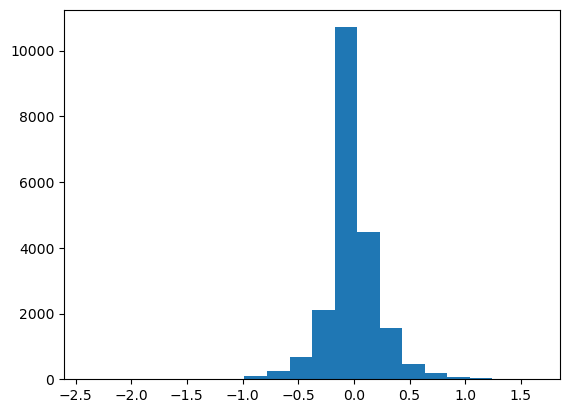

In [18]:
# Plot distribution of differences
plt.hist(df_pred_vs_actual['Diff'],bins=20)

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 9.0000e+00,
        1.2000e+01, 1.2000e+01, 5.9000e+01, 1.7800e+02, 5.0900e+02,
        1.8900e+03, 4.8710e+03, 1.0565e+04, 1.7990e+03, 5.3800e+02,
        1.8800e+02, 7.2000e+01, 2.2000e+01, 5.0000e+00, 4.0000e+00]),
 array([-3.12, -2.86, -2.6 , -2.34, -2.08, -1.82, -1.56, -1.3 , -1.04,
        -0.78, -0.52, -0.26,  0.  ,  0.26,  0.52,  0.78,  1.04,  1.3 ,
         1.56,  1.82,  2.08]),
 <BarContainer object of 20 artists>)

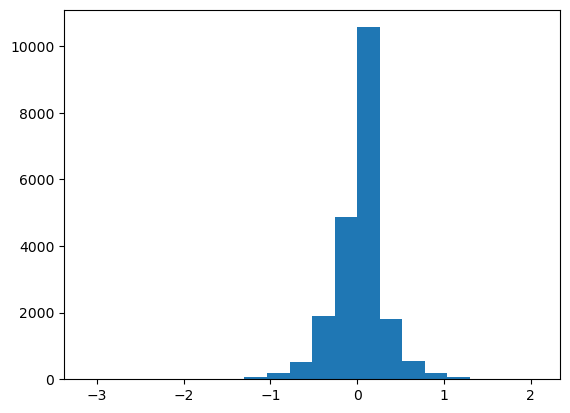

In [19]:
# Plot distribution of %difference
plt.hist(df_pred_vs_actual['%Diff'],bins=20)

### Overall Predictions vs. Actual Prices

[Text(0.5, 0, ''), Text(0, 0.5, 'Close Price')]

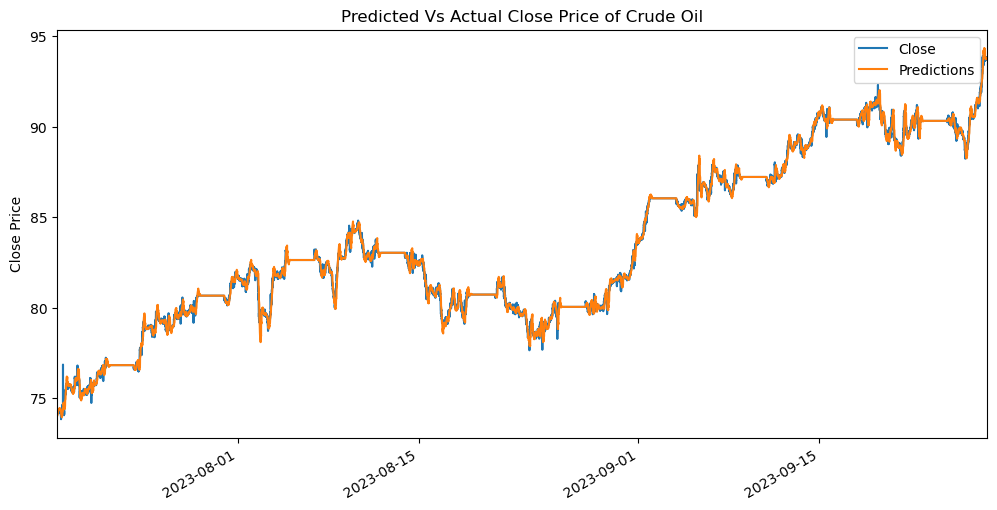

In [20]:
# Plot predictions against known values
title = 'Predicted Vs Actual Close Price of Crude Oil'
ylabel='Close Price'
xlabel='' 

ax = df_pred_vs_actual['Close'].plot(legend=True,figsize=(12,6),title=title)
df_pred_vs_actual['Predictions'].plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

### One Month Close-up

[Text(0.5, 0, ''), Text(0, 0.5, 'Close Price')]

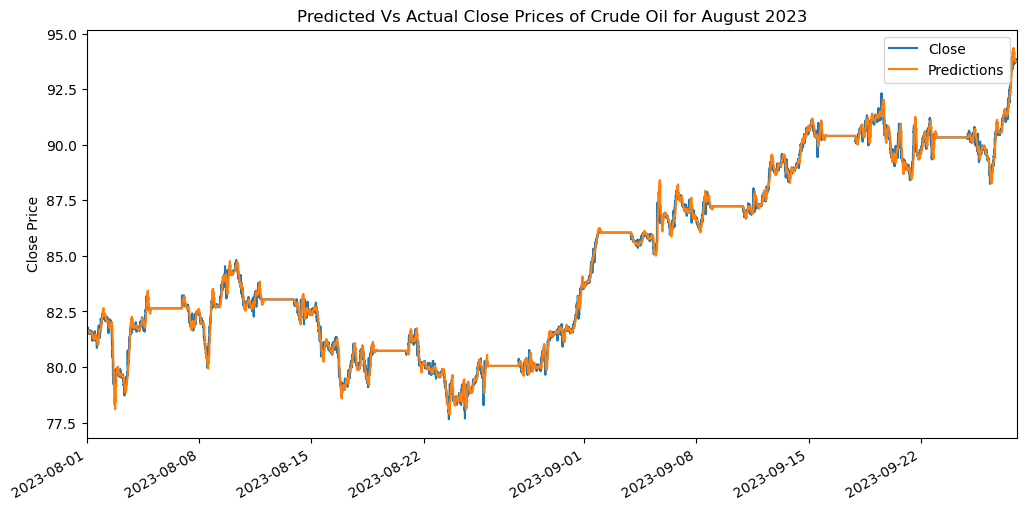

In [21]:
# Make a plot for the month of August
start = '2023-08-01 00:00:00'
end = '2023-10-31 23:55:00'

title = 'Predicted Vs Actual Close Prices of Crude Oil for August 2023'
ylabel='Close Price'
xlabel='' 

ax = df_pred_vs_actual[start:end]['Close'].plot(legend=True,figsize=(12,6),title=title)
df_pred_vs_actual[start:end]['Predictions'].plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

### 5-Day Close-up 

[Text(0.5, 0, ''), Text(0, 0.5, 'Close Price')]

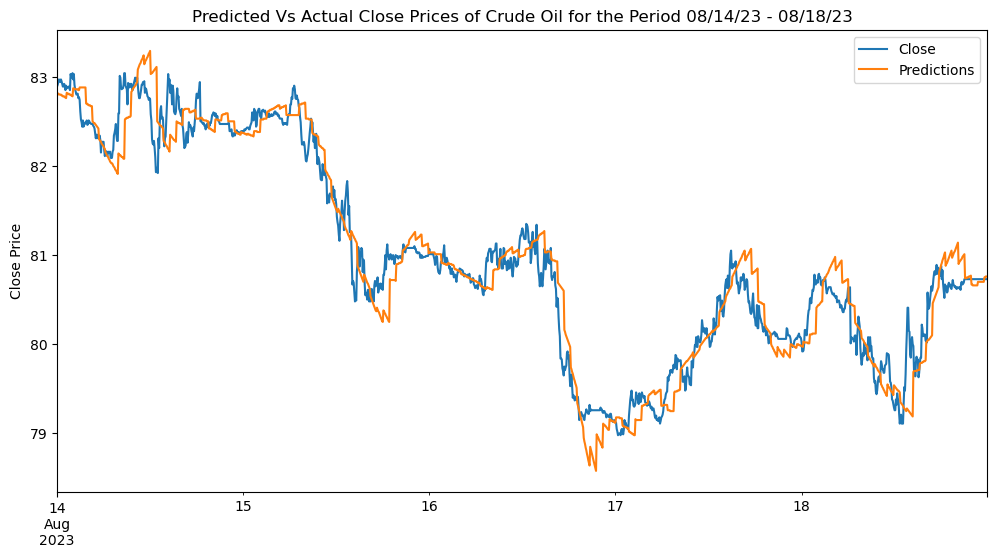

In [22]:
# Make a plot for 5-days from 08/14/23 - 08/18/23
start = '2023-08-14 00:00:00'
end = '2023-08-18 23:55:00'

title = 'Predicted Vs Actual Close Prices of Crude Oil for the Period 08/14/23 - 08/18/23'
ylabel='Close Price'
xlabel='' 

ax = df_pred_vs_actual[start:end]['Close'].plot(legend=True,figsize=(12,6),title=title)
df_pred_vs_actual[start:end]['Predictions'].plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

### One Day Close-up

[Text(0.5, 0, ''), Text(0, 0.5, 'Close Price')]

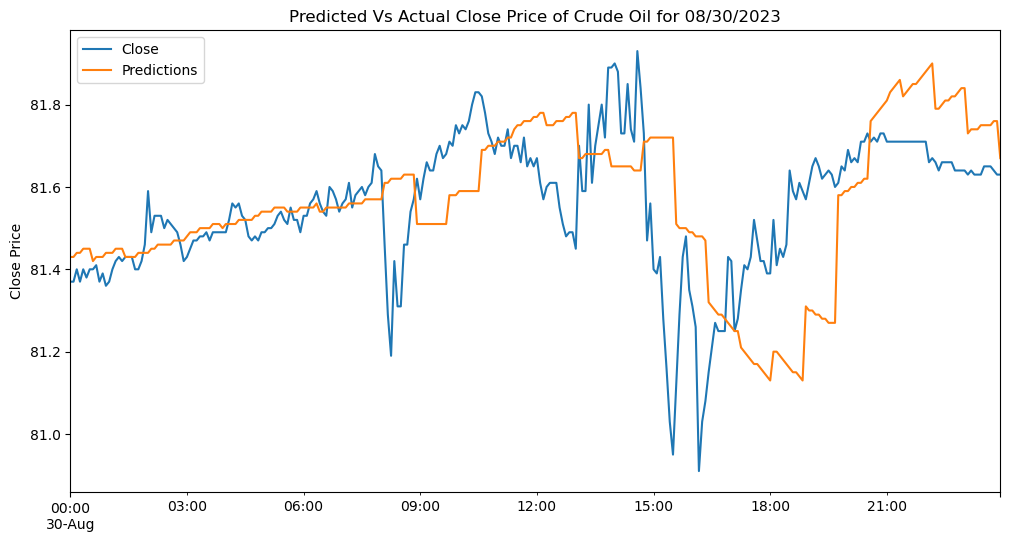

In [23]:
# Make a plot for the 30th of August
start = '2023-08-30 00:00:00'
end = '2023-08-30 23:55:00'

# Plot predictions against known values
title = 'Predicted Vs Actual Close Price of Crude Oil for 08/30/2023'
ylabel='Close Price'
xlabel='' # we don't really need a label here

ax = df_pred_vs_actual[start:end]['Close'].plot(legend=True,figsize=(12,6),title=title)
df_pred_vs_actual[start:end]['Predictions'].plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

# 6. Prophet Plots

Here, we use the Prophet plotting tool to plot the predictions, together with the envelope of upper and lower estimates, in addition to the points of change of trend.

## All Data 

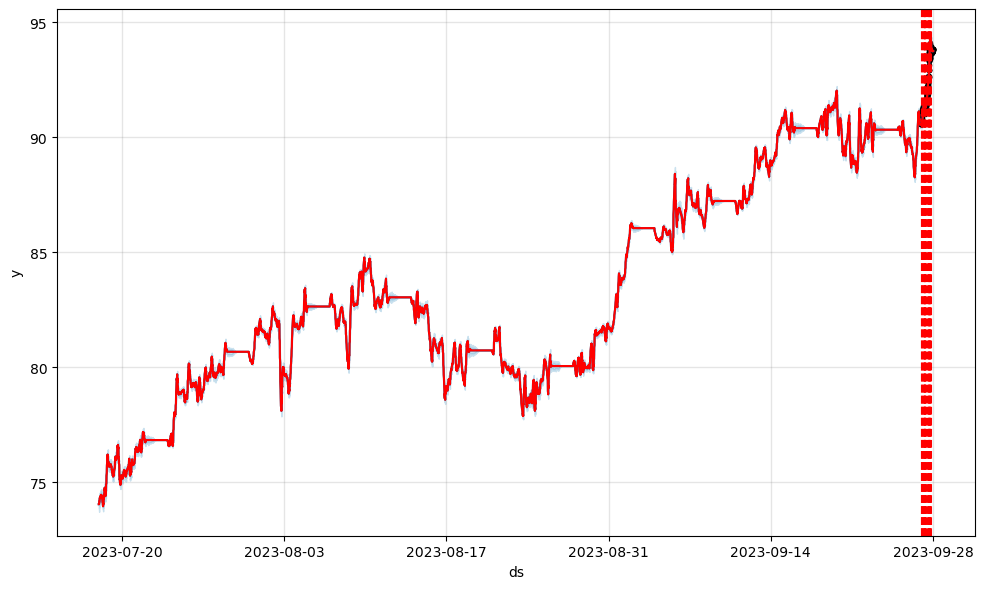

In [24]:
fig = m.plot(all_predictions)
a = add_changepoints_to_plot(fig.gca(), m, all_predictions)

## Close-up 

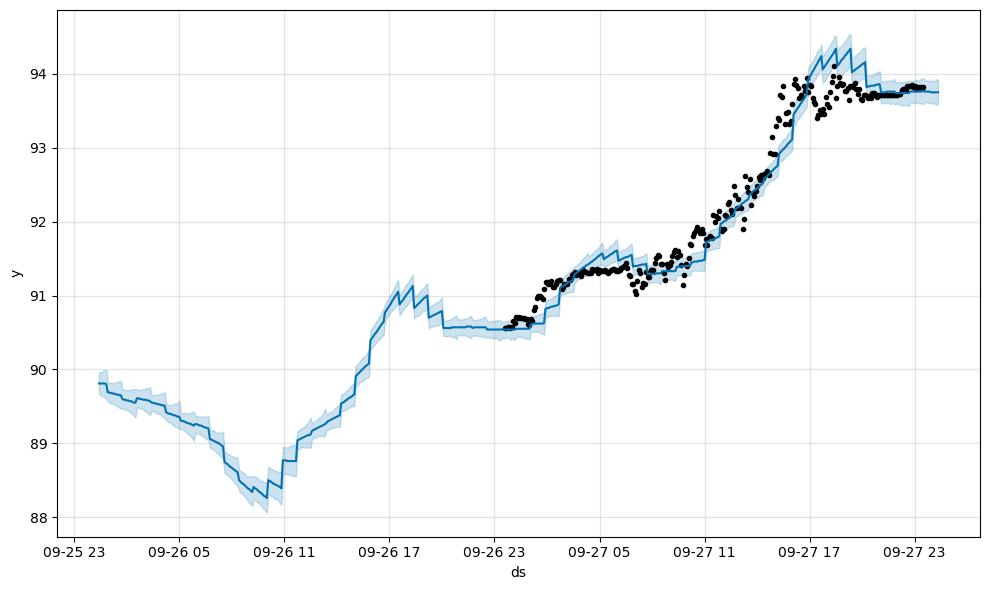

In [25]:
i=2
fig = m.plot(all_predictions[-i*train_length:])

# 6. Forecast into Future

## 6.1 Using Prophet Tool

In [26]:
m = Prophet()   
m.fit(df_close.iloc[-train_length:])
future = m.make_future_dataframe(periods = test_span, freq='5T')
forecast = np.round(m.predict(future),2)

# Measure Time
start_time = time.time()


print(forecast)
print("--- %s seconds ---" % (time.time() - start_time))

09:13:15 - cmdstanpy - INFO - Chain [1] start processing
09:13:15 - cmdstanpy - INFO - Chain [1] done processing


                     ds  trend  yhat_lower  yhat_upper  trend_lower  \
0   2023-09-27 00:00:00  90.63       90.50       90.76        90.63   
1   2023-09-27 00:05:00  90.64       90.51       90.76        90.64   
2   2023-09-27 00:10:00  90.64       90.52       90.77        90.64   
3   2023-09-27 00:15:00  90.65       90.51       90.78        90.65   
4   2023-09-27 00:20:00  90.65       90.53       90.78        90.65   
..                  ...    ...         ...         ...          ...   
293 2023-09-28 00:25:00  93.80       93.64       93.94        93.75   
294 2023-09-28 00:30:00  93.80       93.64       93.96        93.73   
295 2023-09-28 00:35:00  93.80       93.62       93.96        93.71   
296 2023-09-28 00:40:00  93.80       93.61       93.97        93.68   
297 2023-09-28 00:45:00  93.80       93.61       93.99        93.65   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0          90.63             0.0                   0.0             

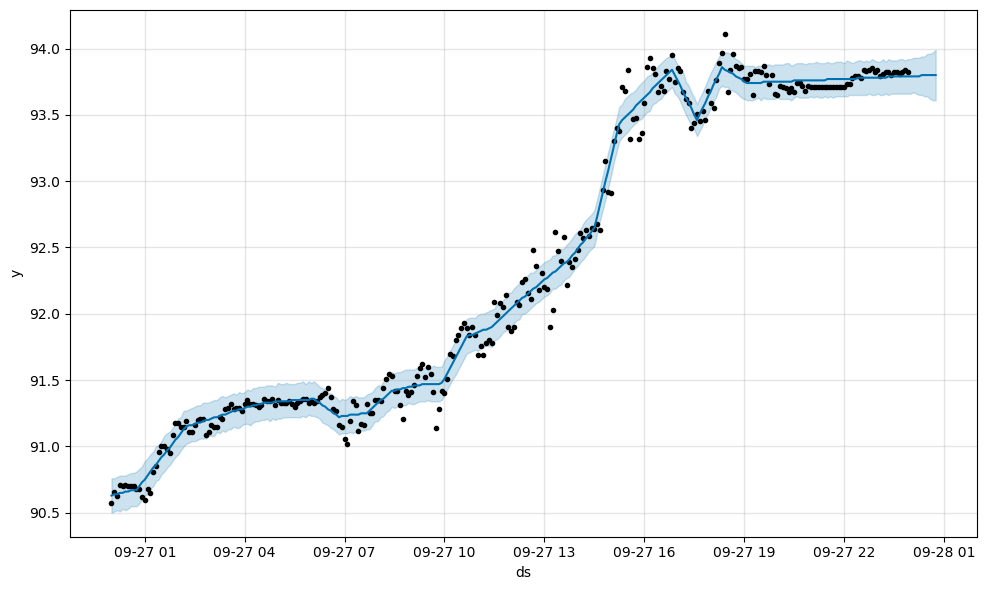

In [27]:
fig = m.plot(forecast)

## 6.2 Using New DF

We create a DataFrame of the predictions, the upper and lower limits and the actual prices.

In [28]:
pd.DataFrame(forecast.iloc[-10:][['yhat','yhat_lower','yhat_upper']])

,yhat,yhat_lower,yhat_upper
288,93.79,93.66,93.92
289,93.79,93.67,93.93
290,93.79,93.66,93.93
291,93.79,93.65,93.93
292,93.80,93.65,93.94
293,93.80,93.64,93.94
294,93.80,93.64,93.96
295,93.80,93.62,93.96
296,93.80,93.61,93.97
297,93.80,93.61,93.99


In [29]:
# Compare with actual prices
df_forecast = pd.DataFrame(forecast.iloc[-10:][['yhat','yhat_lower','yhat_upper']])
df_forecast.rename(columns = {'yhat':'Predictions','yhat_lower':'Lower Bound','yhat_upper':'Upper Bound'},inplace=True)
df_forecast['Actual Close'] = [93.85, 93.99, 94.04, 94.05, 94.23, 94.16, 94.23, 94.27, 94.26, 94.39]

df_forecast['Diff'] = df_forecast['Predictions']-df_forecast['Actual Close']
df_forecast['%Diff'] = np.round(100*(df_forecast['Predictions']-df_forecast['Actual Close'])/df_forecast['Actual Close'],2)
df_forecast

,Predictions,Lower Bound,Upper Bound,Actual Close,Diff,%Diff
288,93.79,93.66,93.92,93.85,-0.06,-0.06
289,93.79,93.67,93.93,93.99,-0.20,-0.21
290,93.79,93.66,93.93,94.04,-0.25,-0.27
291,93.79,93.65,93.93,94.05,-0.26,-0.28
292,93.80,93.65,93.94,94.23,-0.43,-0.46
293,93.80,93.64,93.94,94.16,-0.36,-0.38
294,93.80,93.64,93.96,94.23,-0.43,-0.46
295,93.80,93.62,93.96,94.27,-0.47,-0.50
296,93.80,93.61,93.97,94.26,-0.46,-0.49
297,93.80,93.61,93.99,94.39,-0.59,-0.63


In [30]:
print('RMSE of Close Price predictions:' + str(np.round(np.sqrt(mean_squared_error(df_forecast['Predictions'],df_forecast['Actual Close'])),2)))
print('MAE of Close Price predictions:' + str(np.round(mean_absolute_error(df_forecast['Predictions'],df_forecast['Actual Close']),2)))
print('MAPE of Close Price predictions:' + str(np.round(mean_absolute_percentage_error(df_forecast['Predictions'],df_forecast['Actual Close']),4)))
print('R^2 of Close Price predictions:' + str(np.round(r2_score(df_forecast['Predictions'],df_forecast['Actual Close']),4)))

RMSE of Close Price predictions:0.38
MAE of Close Price predictions:0.35
MAPE of Close Price predictions:0.0037
R^2 of Close Price predictions:-6056.0833


[Text(0.5, 0, ''), Text(0, 0.5, 'Close Price')]

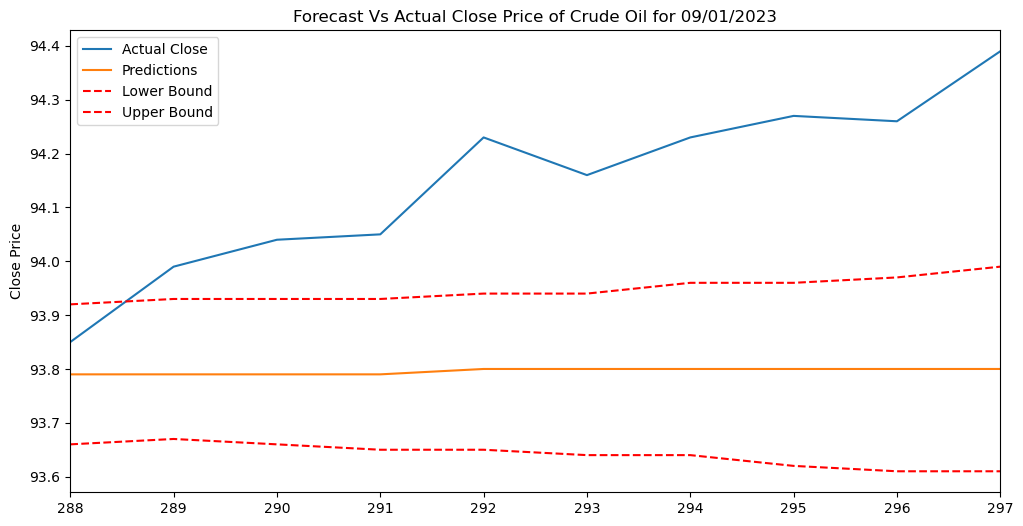

In [31]:
title = 'Forecast Vs Actual Close Price of Crude Oil for 09/01/2023'
ylabel='Close Price'
xlabel='' # we don't really need a label here

ax = df_forecast['Actual Close'].plot(legend=True,figsize=(12,6),title=title)
df_forecast['Predictions'].plot(legend=True)
df_forecast['Lower Bound'].plot(ls="--",color='red',legend=True)
df_forecast['Upper Bound'].plot(ls="--",color='red',legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

## 6.3 Prophet Used for Loss Protection

Here we show how the predictions of Prophet can be used to define stop losses. If the price predictions are taken from Prophet (yhat), then the loss protection are taken to be equal to yhat_lower for long trades and yhat_upper for short trades, as shown in the plot immediate above this. However, if the predictions are taken from another algorithm, then we can use yhat_upper and yhat_lower to define the loss protection as follows

  $\text{Loss Protection Price} = \Big(1-\frac{\hat{y}_{lower}}{\hat{y}} \Big) \times \text{Entry Price} \rightarrow \text{Long Trades}\\$
   $\text{Loss Protection Price} = \Big(\frac{\hat{y}_{upper}}{\hat{y}} -1\Big) \times \text{Entry Price} \rightarrow \text{Short Trades}$

In [32]:
# Prepare Dataframce
df_protection = df_forecast.copy()
df_protection.drop(['Diff','%Diff'],axis=1,inplace=True)

# Add LSTM predictions
df_protection.columns = ['yhat','yhat_lower','yhat_upper','Actual Close']
LSTM_preds = [83.24, 83.55, 83.60, 83.53, 83.99, 83.89, 83.83, 83.48, 83.65, 83.83]

df_protection['LSTM_preds'] = LSTM_preds

df_protection.reset_index(inplace=True)
df_protection.drop(['index'],axis=1,inplace=True)

In [33]:
# As an example, calculate the upper and lower prices based on ARIMA_pred, yhat, yhat_upper and yhat_lower
df_protection['Long Loss Protection'] = np.round((df_protection['yhat_lower']/df_protection['yhat']) * df_protection['LSTM_preds'],2)
df_protection['Short Loss Protection'] = np.round((df_protection['yhat_upper']/df_protection['yhat']) * df_protection['LSTM_preds'],2)
df_protection

,yhat,yhat_lower,yhat_upper,Actual Close,LSTM_preds,Long Loss Protection,Short Loss Protection
0,93.79,93.66,93.92,93.85,83.24,83.12,83.36
1,93.79,93.67,93.93,93.99,83.55,83.44,83.67
2,93.79,93.66,93.93,94.04,83.60,83.48,83.72
3,93.79,93.65,93.93,94.05,83.53,83.41,83.65
4,93.80,93.65,93.94,94.23,83.99,83.86,84.12
5,93.80,93.64,93.94,94.16,83.89,83.75,84.02
6,93.80,93.64,93.96,94.23,83.83,83.69,83.97
7,93.80,93.62,93.96,94.27,83.48,83.32,83.62
8,93.80,93.61,93.97,94.26,83.65,83.48,83.80
9,93.80,93.61,93.99,94.39,83.83,83.66,84.00


[Text(0.5, 0, ''), Text(0, 0.5, 'Close Price')]

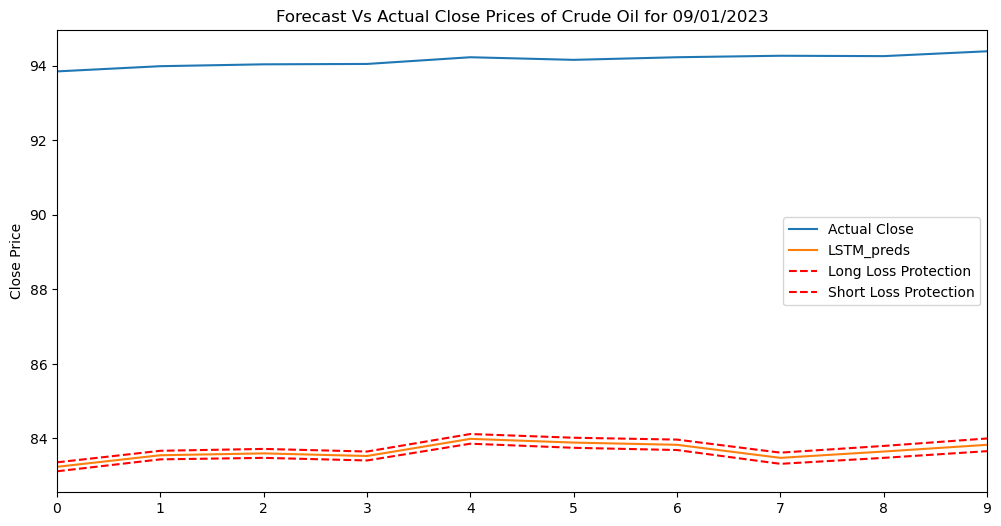

In [34]:
title = 'Forecast Vs Actual Close Prices of Crude Oil for 09/01/2023'
ylabel='Close Price'
xlabel='' # we don't really need a label here

ax = df_protection['Actual Close'].plot(legend=True,figsize=(12,6),title=title)
df_protection['LSTM_preds'].plot(legend=True)
df_protection['Long Loss Protection'].plot(ls="--",color='red',legend=True)
df_protection['Short Loss Protection'].plot(ls="--",color='red',legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)